In [2]:
# Importings your Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Loading your CSV file.

DF = pd.read_csv('my data/weight-height.xls')

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
DF.shape

(10000, 3)

In [10]:
DF.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [14]:
DF.head(-1)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9994,Female,59.098250,110.529686
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319


In [16]:
# Dropping the Weight col
DF.drop('Weight',axis=1, inplace=True)
DF.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


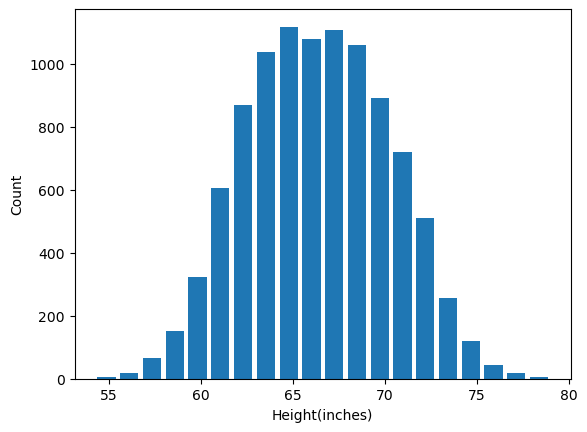

In [17]:
plt.hist(DF.Height, bins=20, rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

In [21]:
#to include the bell curve
from scipy.stats import norm
import numpy as np

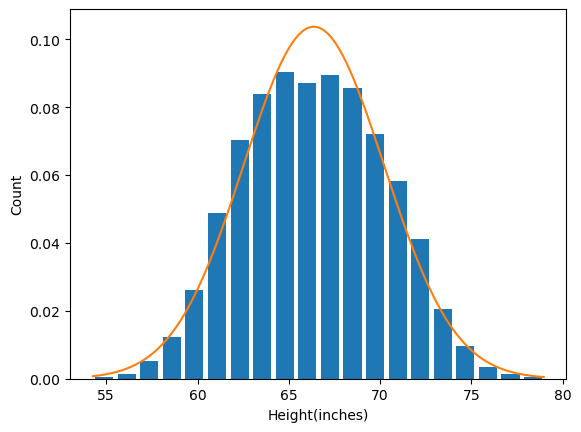

In [24]:
plt.hist(DF.Height, bins=20, rwidth=0.8, density = True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

#plotting the bell curve

rng = np.arange(DF.Height.min(), DF.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, DF.Height.mean(), DF.Height.std()))
plt.show()

Standard deviation shows you how far away a data point is from the mean value.

In [25]:
DF.Height.describe()


count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [26]:

# Using the three standard deviation to remove outliers from the data. This is the most used.

#figuring out the upper limit
upper_limit = DF.Height.mean()+3*DF.Height.std()
upper_limit

77.91014411714094

In [27]:
#figuring out the lower limit
lower_limit = DF.Height.mean()-3*DF.Height.std()
lower_limit

54.82497539250154

Now any value above 77.91 can be marked as an outlier.
Any value below 54.82 can be marked as an outlier.

In [29]:
DF[(DF.Height>upper_limit) | (DF.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


These values may be valid heights of individuals. But since it is very different from the rest it is important that you address them because they can hamper the accuracy of your model. What you can do is to discuss your outlier results with your business manager or refer back to the business problem.

In [35]:
##removing the outliers

new_DF = DF[(DF.Height<upper_limit) & (DF.Height>lower_limit)]


In [36]:
new_DF

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


               Using Z-score


A Z-score tells you how far a data point is from the mean, measured in standard deviations.

    
You can think of it like this:


“How many steps away from the average is this value?”
E.g if a data point is 3 standard deviation from the mean, then the z-score is 3.


x−μ/σ  =  Z

Where


x = the data point

mu = the mean


sigma = standard deviation

In [39]:
DF['zscore']= (DF.Height-DF.Height.mean())/DF.Height.std()
DF.head(10)

,Gender,Height,z score,zscore
0,Male,73.847017,1.943964,1.943964
1,Male,68.781904,0.627505,0.627505
2,Male,74.110105,2.012343,2.012343
3,Male,71.730978,1.393991,1.393991
4,Male,69.881796,0.913375,0.913375
5,Male,67.253016,0.230136,0.230136
6,Male,68.785081,0.628331,0.628331
7,Male,68.348516,0.514865,0.514865
8,Male,67.018950,0.169301,0.169301
9,Male,63.456494,-0.756607,-0.756607


In [40]:
DF['zscore'].min()

-3.146026760498773

In [42]:
#Now we can filter out rows that have a z-score below -3 and above 3
DF[DF['zscore']>3]

,Gender,Height,z score,zscore
994,Male,78.095867,3.048271,3.048271
1317,Male,78.462053,3.143445,3.143445
2014,Male,78.998742,3.282934,3.282934
3285,Male,78.528210,3.160640,3.160640
3757,Male,78.621374,3.184854,3.184854


In [43]:
DF[DF['zscore']<-3]

,Gender,Height,z score,zscore
6624,Female,54.616858,-3.054091,-3.054091
9285,Female,54.263133,-3.146027,-3.146027


In [48]:
##removing the outliers

new_DF2 = DF[(DF['zscore']> -3) & (DF['zscore']<3)]

In [49]:
new_DF2.head()

,Gender,Height,z score,zscore
0,Male,73.847017,1.943964,1.943964
1,Male,68.781904,0.627505,0.627505
2,Male,74.110105,2.012343,2.012343
3,Male,71.730978,1.393991,1.393991
4,Male,69.881796,0.913375,0.913375


In [50]:
new_DF2.shape

(9993, 4)

Using IQR technique
To use this technique you need to understand percentiles.

In [51]:
DF.describe()

,Height,z score,zscore
count,10000.000000,1.000000e+04,1.000000e+04
mean,66.367560,1.818989e-16,1.818989e-16
std,3.847528,1.000000e+00,1.000000e+00
min,54.263133,-3.146027e+00,-3.146027e+00
25%,63.505620,-7.438384e-01,-7.438384e-01
50%,66.318070,-1.286272e-02,-1.286272e-02
75%,69.174262,7.294819e-01,7.294819e-01
max,78.998742,3.282934e+00,3.282934e+00


In [52]:
DF.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

Here:

min (0th percentile) = 54.2

0% of the data is below that value

25th percentile(Q1) = 63.5

This means 25% of the data are below/less than this value.

50th percentile(Q2) = 66.3

50% of the data are below this value.

75th percentile(Q3) = 69.1

75% of the data are below this value.

max (100th percentile) = 78.9

100% of the data is below that value

Calulating the IQR

IQR = Q3 -Q1

To remove outliers, you need upper and lower limit.

lower_limit = Q1-(1.5*1QR)

upper_limit = Q3+(1.5*IQR)

Why Use 1.5 * IQR?
The 1.5 multiplier is a convention that balances sensitivity and robustness:

It extends the “normal” range a bit beyond the central 50% of data.

Any value too far outside this range is considered potentially abnormal or influential.

It’s not random—it reflects an assumption that in a fairly symmetric or moderately skewed dataset:

Most values should fall within this range.

Values far beyond it are rare and might distort analysis (e.g., mean, regression results).

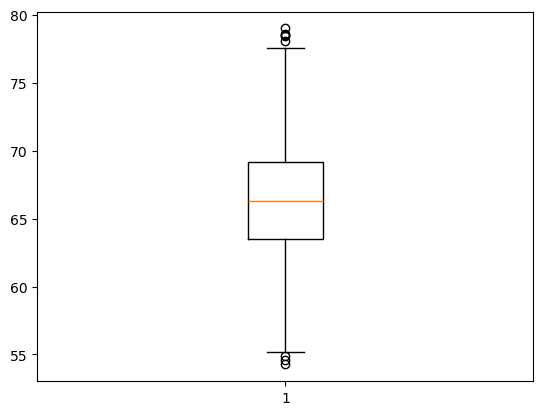

In [54]:
plt.boxplot(DF.Height)
plt.show()

In [55]:
#step 1- find the Q1 and Q3

Q1 = DF['Height'].quantile(0.25)
Q3 = DF['Height'].quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [56]:
#step 2 - find the IQR
IQR = Q3-Q1
IQR

5.668641245615746

In [57]:
#step 3 - find the lower limit
lower_limit = Q1 - 1.5*IQR

#step 4 - find the upper limit
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [58]:
DF[(DF.Height<lower_limit) | (DF.Height>upper_limit)]

,Gender,Height,z score,zscore
994,Male,78.095867,3.048271,3.048271
1317,Male,78.462053,3.143445,3.143445
2014,Male,78.998742,3.282934,3.282934
3285,Male,78.528210,3.160640,3.160640
3757,Male,78.621374,3.184854,3.184854
6624,Female,54.616858,-3.054091,-3.054091
7294,Female,54.873728,-2.987329,-2.987329
9285,Female,54.263133,-3.146027,-3.146027


In [59]:
new_DF3 = DF[(DF.Height>lower_limit) & (DF.Height<upper_limit)]
new_DF3.head()

,Gender,Height,z score,zscore
0,Male,73.847017,1.943964,1.943964
1,Male,68.781904,0.627505,0.627505
2,Male,74.110105,2.012343,2.012343
3,Male,71.730978,1.393991,1.393991
4,Male,69.881796,0.913375,0.913375


In [60]:
new_DF3.describe()

,Height,z score,zscore
count,9992.000000,9992.000000,9992.000000
mean,66.365006,-0.000664,-0.000664
std,3.833980,0.996479,0.996479
min,55.148557,-2.915899,-2.915899
25%,63.509087,-0.742937,-0.742937
50%,66.317827,-0.012926,-0.012926
75%,69.169386,0.728215,0.728215
max,77.547186,2.905665,2.905665


Using Percentile
This can be seen as percentile capping where we define thresholds according to the percentiles we want and then use it to filter the data. This is especially useful when you have domain knowledge.

In [61]:
Max_threshold = DF['Height'].quantile(0.95)

In [62]:
Max_threshold

72.61710606642384

In [63]:
DF[DF['Height']>Max_threshold]

,Gender,Height,z score,zscore
0,Male,73.847017,1.943964,1.943964
2,Male,74.110105,2.012343,2.012343
23,Male,75.205974,2.297167,2.297167
27,Male,72.800844,1.672056,1.672056
31,Male,74.033808,1.992512,1.992512
...,...,...,...,...
4975,Male,73.339590,1.812080,1.812080
4977,Male,74.043290,1.994977,1.994977
4989,Male,72.726342,1.652693,1.652693
4994,Male,73.092871,1.747956,1.747956


In [64]:
Min_threshold = DF['Height'].quantile(0.5)
Min_threshold

66.31807008178464

In [65]:
DF[DF['Height']<Min_threshold]

,Gender,Height,z score,zscore
9,Male,63.456494,-0.756607,-0.756607
12,Male,64.766329,-0.416171,-0.416171
17,Male,63.974326,-0.622019,-0.622019
22,Male,66.149132,-0.056771,-0.056771
38,Male,65.807316,-0.145611,-0.145611
...,...,...,...,...
9993,Female,60.030434,-1.647064,-1.647064
9994,Female,59.098250,-1.889345,-1.889345
9995,Female,66.172652,-0.050658,-0.050658
9997,Female,63.867992,-0.649655,-0.649655


In [67]:
new_DF4 = DF[(DF.Height>Min_threshold) & (DF.Height<Max_threshold)]
new_DF4.head()

,Gender,Height,z score,zscore
1,Male,68.781904,0.627505,0.627505
3,Male,71.730978,1.393991,1.393991
4,Male,69.881796,0.913375,0.913375
5,Male,67.253016,0.230136,0.230136
6,Male,68.785081,0.628331,0.628331
